2020-09-24

## 복습
- 람다식 : 이름없는 함수 (일회성)
<code>
데이터프레임.apply(lambda x: x.함수)
</code>
- groupby
<code>
df.groupby('컬럼').sum() : 합계
df.groupby('컬럼').mean() : 평균
df.groupby('컬럼').median() : 중간 값
</code>

In [1]:
import pandas as pd

In [4]:
path = r'C:\Users\cypark\Desktop\실습자료\GBS Python 자료\판다스 연습용 데이터\2018년 2차_졸업생의 진로 현황(전체).xlsx'

graduation = pd.read_excel(path, sheet_name=1)

In [11]:
graduation.head(1)  # 앞에서 n개 행 가져오기 (기본값 5개)

graduation.tail()  # 뒤에서 n개 행 가져오기 (기본값 5개)

,시도교육청,지역교육청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,주야간,제외여부,제외사유,...,진학자 계.2,진학자 계.3,취업자,취업자.1,취업자.2,취업자.3,(미진학자)무직자 및 미상,(미진학자)무직자 및 미상.1,(미진학자)무직자 및 미상.2,(미진학자)무직자 및 미상.3
3454,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000844,탐라중학교,03,공립,주간,N,NaN,...,297,99.7,0,0,0,0,1,0,1,0.3
3455,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000512,제주영지학교,05,공립,주간,N,NaN,...,12,100,0,0,0,0,0,0,0,0
3456,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000513,제주영송학교,05,사립,주간,N,NaN,...,21,100,0,0,0,0,0,0,0,0
3457,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 서귀포시,S170000790,서귀포온성학교,05,공립,주간,N,NaN,...,9,100,0,0,0,0,0,0,0,0
3458,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000870,제주제일중학교부설방송통신중학교,25,공립,NaN,Y,2019년 졸업예정이므로 제외,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
graduation.columns

g2 = graduation[ ['지역', '학교명','졸업자.2', '(특수목적고)과학고 진학자.2', '(특수목적고)외고ㆍ국제고 진학자.2', '정보공시 \n 학교코드'] ]
g2.head(3)

,지역,학교명,졸업자.2,(특수목적고)과학고 진학자.2,(특수목적고)외고ㆍ국제고 진학자.2,정보공시 학교코드
0,지역,학교명,합계,합계,합계,정보공시 \n 학교코드
1,서울특별시 성북구,서울대학교사범대학부설중학교,234,4,5,S000003514
2,서울특별시 종로구,서울대학교사범대학부설여자중학교,172,0,8,S000003562


In [15]:
g2.columns

Index(['지역', '학교명', '졸업자.2', '(특수목적고)과학고 진학자.2', '(특수목적고)외고ㆍ국제고 진학자.2',
       '정보공시 \n 학교코드'],
      dtype='object')

In [16]:
g2.columns = ['local', 'sch_name', 'grad_num', 'sci_num', 'frg_num', 'code']

In [18]:
g2.head(3)

,local,sch_name,grad_num,sci_num,frg_num,code
0,지역,학교명,합계,합계,합계,정보공시 \n 학교코드
1,서울특별시 성북구,서울대학교사범대학부설중학교,234,4,5,S000003514
2,서울특별시 종로구,서울대학교사범대학부설여자중학교,172,0,8,S000003562


In [20]:
g3 = g2.drop(0)
# g2.drop([0, 1, 2])

In [21]:
g3.head(3)

,local,sch_name,grad_num,sci_num,frg_num,code
1,서울특별시 성북구,서울대학교사범대학부설중학교,234,4,5,S000003514
2,서울특별시 종로구,서울대학교사범대학부설여자중학교,172,0,8,S000003562
3,서울특별시 강남구,개원중학교,214,2,9,S010000698


In [25]:
g3.isna().sum()

local        2
sch_name     0
grad_num    34
sci_num     34
frg_num     34
code         0
dtype: int64

In [27]:
g4 = g3.dropna()

In [29]:
g3.tail(3)

,local,sch_name,grad_num,sci_num,frg_num,code
3456,제주특별자치도 제주시,제주영송학교,21,0,0,S170000513
3457,제주특별자치도 서귀포시,서귀포온성학교,9,0,0,S170000790
3458,제주특별자치도 제주시,제주제일중학교부설방송통신중학교,NaN,NaN,NaN,S170000870


In [28]:
g4.tail(3)

,local,sch_name,grad_num,sci_num,frg_num,code
3455,제주특별자치도 제주시,제주영지학교,12,0,0,S170000512
3456,제주특별자치도 제주시,제주영송학교,21,0,0,S170000513
3457,제주특별자치도 서귀포시,서귀포온성학교,9,0,0,S170000790


In [30]:
g4.dtypes

local       object
sch_name    object
grad_num    object
sci_num     object
frg_num     object
code        object
dtype: object

In [36]:
g4['grad_num'] = pd.to_numeric(g4['grad_num'])  # g4['grad_num'] = g4['grad_num'].apply(int)
g4['sci_num'] = pd.to_numeric(g4['sci_num'])
g4['frg_num'] = pd.to_numeric(g4['frg_num'])

C:\Users\cypark\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\cypark\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cypark\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [37]:
g4.dtypes

local       object
sch_name    object
grad_num     int64
sci_num      int64
frg_num      int64
code        object
dtype: object

In [39]:
g5 = g4.reset_index(drop=True)

In [40]:
g5.head(3)

,local,sch_name,grad_num,sci_num,frg_num,code
0,서울특별시 성북구,서울대학교사범대학부설중학교,234,4,5,S000003514
1,서울특별시 종로구,서울대학교사범대학부설여자중학교,172,0,8,S000003562
2,서울특별시 강남구,개원중학교,214,2,9,S010000698


In [46]:
# apply

def temp(x):
    return x.split(' ')[0]

g5['sido'] = g5['local'].apply(temp)

In [47]:
# lambda => 이름없는 함수 (일회성)

g5['sido'] = g5['local'].apply(lambda x: x.split(' ')[0])

0         서울특별시
1         서울특별시
2         서울특별시
3         서울특별시
4         서울특별시
5         서울특별시
6         서울특별시
7         서울특별시
8         서울특별시
9         서울특별시
10        서울특별시
11        서울특별시
12        서울특별시
13        서울특별시
14        서울특별시
15        서울특별시
16        서울특별시
17        서울특별시
18        서울특별시
19        서울특별시
20        서울특별시
21        서울특별시
22        서울특별시
23        서울특별시
24        서울특별시
25        서울특별시
26        서울특별시
27        서울특별시
28        서울특별시
29        서울특별시
         ...   
3392    제주특별자치도
3393    제주특별자치도
3394    제주특별자치도
3395    제주특별자치도
3396    제주특별자치도
3397    제주특별자치도
3398    제주특별자치도
3399    제주특별자치도
3400    제주특별자치도
3401    제주특별자치도
3402    제주특별자치도
3403    제주특별자치도
3404    제주특별자치도
3405    제주특별자치도
3406    제주특별자치도
3407    제주특별자치도
3408    제주특별자치도
3409    제주특별자치도
3410    제주특별자치도
3411    제주특별자치도
3412    제주특별자치도
3413    제주특별자치도
3414    제주특별자치도
3415    제주특별자치도
3416    제주특별자치도
3417    제주특별자치도
3418    제주특별자치도
3419    제주특별자치도
3420    제주특별자치도
3421    제주특별자치도
Name: local, Length: 342

In [49]:
g5['gugun'] = g5['local'].apply(lambda x: x.split(' ')[1])

In [50]:
g5.head()

,local,sch_name,grad_num,sci_num,frg_num,code,sido,gugun
0,서울특별시 성북구,서울대학교사범대학부설중학교,234,4,5,S000003514,서울특별시,성북구
1,서울특별시 종로구,서울대학교사범대학부설여자중학교,172,0,8,S000003562,서울특별시,종로구
2,서울특별시 강남구,개원중학교,214,2,9,S010000698,서울특별시,강남구
3,서울특별시 서초구,경원중학교,310,5,4,S010000700,서울특별시,서초구
4,서울특별시 강남구,구룡중학교,256,3,4,S010000701,서울특별시,강남구


In [53]:
# 벡터 연산

g5['sp_num'] = g5['sci_num'] + g5['frg_num']
# g5.drop('total_num', axis=1, inplace=True) => 컬럼 삭제 (inplace=True로 기존 데이터프레임에 바로 적용)

In [54]:
g5.head()

,local,sch_name,grad_num,sci_num,frg_num,code,sido,gugun,total_num,sp_num
0,서울특별시 성북구,서울대학교사범대학부설중학교,234,4,5,S000003514,서울특별시,성북구,9,9
1,서울특별시 종로구,서울대학교사범대학부설여자중학교,172,0,8,S000003562,서울특별시,종로구,8,8
2,서울특별시 강남구,개원중학교,214,2,9,S010000698,서울특별시,강남구,11,11
3,서울특별시 서초구,경원중학교,310,5,4,S010000700,서울특별시,서초구,9,9
4,서울특별시 강남구,구룡중학교,256,3,4,S010000701,서울특별시,강남구,7,7


In [60]:
# groupby

g5.groupby('sido').sum()
g5.groupby('sido').mean()
g5.groupby('sido').median()

,grad_num,sci_num,frg_num,total_num,sp_num
sido,,,,,
강원도,33.5,0.0,0.0,0.0,0.0
경기도,183.0,0.0,2.0,2.0,2.0
경상남도,88.0,0.0,0.0,0.0,0.0
경상북도,39.0,0.0,0.0,0.0,0.0
광주광역시,186.0,0.0,1.0,1.0,1.0
대구광역시,168.0,0.0,1.0,1.0,1.0
대전광역시,144.5,0.0,2.0,2.0,2.0
부산광역시,144.0,1.0,3.0,4.0,4.0
서울특별시,174.0,0.0,2.0,3.0,3.0


In [74]:
# filtering

a = g5[ g5['sido'] == '서울특별시' ]

In [75]:
a.groupby('gugun').sum()
a.groupby('gugun').mean()
a.groupby('gugun').median()

,grad_num,sci_num,frg_num,sp_num
gugun,,,,
강남구,196.0,2.0,4.0,7.0
강동구,197.5,0.5,2.0,2.5
강북구,158.0,0.0,1.0,2.0
강서구,159.0,0.0,3.0,3.0
관악구,142.0,1.0,1.0,2.0
광진구,214.0,0.5,1.5,3.0
구로구,189.0,1.0,1.0,1.0
금천구,154.0,0.0,0.5,1.5
노원구,222.0,1.0,5.0,6.0


## 머신러닝 입문
- target : 예측의 대상이 되는 컬럼 / 항상 1개 (1차원)
- feature : 예측의 단서가 되는 컬럼들 / 항상 1개 이상 (2차원)


- 머신러닝 연산 순서 : 모델 생성 => 모델 훈련 => 예측(검증)

In [76]:
import matplotlib.pyplot as plt

# 한글깨짐 및 음수표시를 위한 세팅
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus']=False

In [77]:
import seaborn as sns

In [79]:
# target  => 예측이나 분류의 대상이 되는 컬럼
#         => 항상 1개 (1차원)
# feature => 예측의 단서가 되는 컬럼
#         => 항상 1개 이상 (2차원)

iris_df = sns.load_dataset('iris')

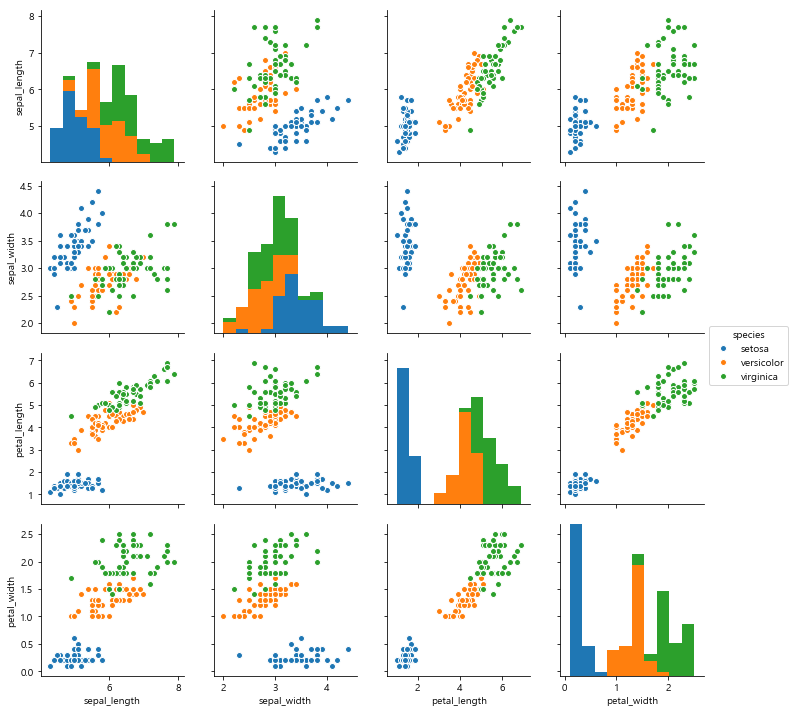

In [84]:
sns.pairplot(iris_df, hue='species')

### KNN
- k-neariest-neighbors (knn) : k개의 가장 가까운 점들을 찾아 분류
- 새로운 데이터 인입 => 다른 점들과의 거리 구함 => k개의 가장 가까운 점들 찾음 => 비중이 높은 점들로 분류
- 모듈 설치
<code>
from sklearn.neighbors import KNeighborsClassifier
</code>
- 기본 방법
  - 모델 생성
  <code>
  knn = KNeighborsClassifier()
  </code>
  - 모델 훈련
  <code>
  knn.fit(feature, target)  => feature는 2차원, target은 1차원 / feature안에 target이 포함되면 안 됨
  </code>
  - 예측
  <code>
  knn.predict(새로운특성값)
  </code>
  - 검증
  <code>
  knn.score(feature, target)
  </code>
- 테스트, 검증 데이터를 나누는 방법
  - 모듈 설치
  <code>
  from sklearn.model_selection import train_test_split
  </code>
  - 테스트, 검증용 feature, target 구하기
  <code>
  train_x,test_x, train_y, test_y = train_test_split(feature, target, shuffle=True, test_size=0.25, random_state=0)
  => 4개 값 리턴 (훈련특성, 테스트특성, 훈련타겟, 테스트타겟)
    [options]
    shuffle=True          : 값을 섞음
    test_size             : 검증용 데이터 비율
    random_state = 정수   : 값을 섞는 방법을 똑같이 적용 (추후 코드를 재현할 때도, 똑같이 섞이게 됨)
</code>
- 교차 검증
  - 검증용으로 사용한 데이터를 훈련용으로 사용하지 못한다는 단점이 있음 => 방안 : cross validation (교차 검증)
  - 모듈 설치
  <code>
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold            : 데이터 나누는 도구 (칼)
  </code>
  - 훈련 및 검증
  <code>
    knn = KNeighborsClassifier()
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    cross_val_score(knn, feature, target, cv=kf)  : 5번의 검증 결과 리턴
  </code>
- n_neighbors (knn의 k) 선정
  - 데이터 별로 k가 달라지는데, 특정 범위의 k로 테스트 후 검증결과가 가장 높은 k 값을 사용한다
  <code>
    result = []
    for i in range(2, 31):
      knn = KNeighborsClassifier(n_neighbors=i)
      result.append(cross_val_score(knn, x, y, cv=kf).mean())
    result
    => 시각화 하면 k 값을 한눈에 찾기 편하다
    plt.plot(range(2, 31), result)
  </code>

In [87]:
# k-neariest-neighbors (knn) => k개의 가장 가까운 점들을 찾아 분류

# 새로운 데이터 인입 => 다른 점들과의 거리 구함 => k개의 가장 가까운 점들 찾음 => 비중이 높은 점들로 분류

from sklearn.neighbors import KNeighborsClassifier
# from 도구상자 import 도구
# 1. 모델 생성 => 2. 모델 훈련 => 3. 예측(검증)

In [89]:
# 1. 모델 생성
knn = KNeighborsClassifier()

In [90]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [94]:
# 2. 모델 훈련
# 훈련시킬 데이터를 넣을 때, 특성값과 타겟을 분리해야 함   *특성값 안에 타겟이 포함되면 안 됨
# 특성값 => 2차원 (x)
# 타겟 => 1차원 (y)

x = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] # feature
y = iris_df['species'] # target

knn.fit(x, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
# 3. 예측(검증)

unknown = [ [5.0, 3.4, 1.1, 0.5], [100.0, 7.9, 0.0, 0.5] ] # new data (feature = 2차원)
knn.predict(unknown)

array(['setosa', 'virginica'], dtype=object)

In [104]:
# knn.predict(x) == y

# 검증
# knn.score(feature, target)
knn.score(x, y)

0.9666666666666667

In [107]:
# 데이터 100 중 80은 훈련용, 20은 검증용으로 사용해본다
# => 문제 : feature의 target이 몰릴 수 있음 (훈련값이 적절하지 않음)
#   => 방안 : 데이터를 랜덤하게 섞어 가져와야 함

from sklearn.model_selection import train_test_split

In [113]:
# train_test_split
# => 4개 값 리턴 (훈련특성, 테스트특성, 훈련타겟, 테스트타겟)

# shuffle=True          : 값을 섞음
# test_size             : 검증용 데이터 비율
# random_state = 정수   : 값을 섞는 방법을 똑같이 적용 (추후 코드를 재현할 때도, 똑같이 섞이게 됨)

train_x,test_x, train_y, test_y = train_test_split(x, y, shuffle=True, test_size=0.25, random_state=0)

In [114]:
train_x,test_x, train_y, test_y

(     sepal_length  sepal_width  petal_length  petal_width
 61            5.9          3.0           4.2          1.5
 92            5.8          2.6           4.0          1.2
 112           6.8          3.0           5.5          2.1
 2             4.7          3.2           1.3          0.2
 141           6.9          3.1           5.1          2.3
 43            5.0          3.5           1.6          0.6
 10            5.4          3.7           1.5          0.2
 60            5.0          2.0           3.5          1.0
 116           6.5          3.0           5.5          1.8
 144           6.7          3.3           5.7          2.5
 119           6.0          2.2           5.0          1.5
 108           6.7          2.5           5.8          1.8
 69            5.6          2.5           3.9          1.1
 135           7.7          3.0           6.1          2.3
 56            6.3          3.3           4.7          1.6
 80            5.5          2.4           3.8          1

In [115]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
knn.score(test_x, test_y)

0.9736842105263158

In [116]:
# 검증용으로 사용한 데이터를 훈련용으로 사용하지 못한다는 단점이 있음
# => 방안 : cross validation (교차 검증)

In [117]:
# 교차 검증

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold           # 데이터 나누는 도구 (칼)

In [119]:
# KFold => 칼을 만들어 둠
# n_splits : 나눌 개수

kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [120]:
# cross_val_score => 교차 검증용 fit + score
# cv : KFold 지정

knn = KNeighborsClassifier()
cross_val_score(knn, x, y, cv=kf)  # 5번의 검증 결과 리턴

array([0.96666667, 0.9       , 1.        , 1.        , 0.93333333])

In [121]:
cross_val_score(knn, x, y, cv=kf).mean() # 평균치

0.96

In [127]:
# k 값 결정
# n_neighbors : k 지정
# => k값은 데이터마다 다르다
# => 특정 범위의 k로 테스트 후 검증결과가 가장 높은 k 값을 사용한다

result = []
for i in range(2, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    result.append(cross_val_score(knn, x, y, cv=kf).mean())

result

[0.9400000000000001,
 0.9533333333333334,
 0.96,
 0.96,
 0.9533333333333334,
 0.9533333333333334,
 0.96,
 0.96,
 0.96,
 0.9666666666666666,
 0.96,
 0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9466666666666667,
 0.9466666666666667,
 0.9400000000000001,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9533333333333334,
 0.9466666666666667,
 0.9466666666666667,
 0.9400000000000001,
 0.9466666666666667,
 0.9400000000000001,
 0.9466666666666667,
 0.9466666666666667,
 0.9400000000000001]

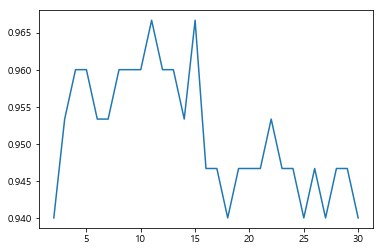

In [129]:
# 시각화 하면 k 값을 한눈에 찾기 편하다
plt.plot(range(2, 31), result)

In [131]:
path = r'C:\Users\cypark\Desktop\실습자료\GBS Python 자료\회귀분석&머신러닝 용 데이터\basketball_stat_KNN예제.csv'
bk_df = pd.read_csv(path, engine = 'python')

In [159]:
bk_df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


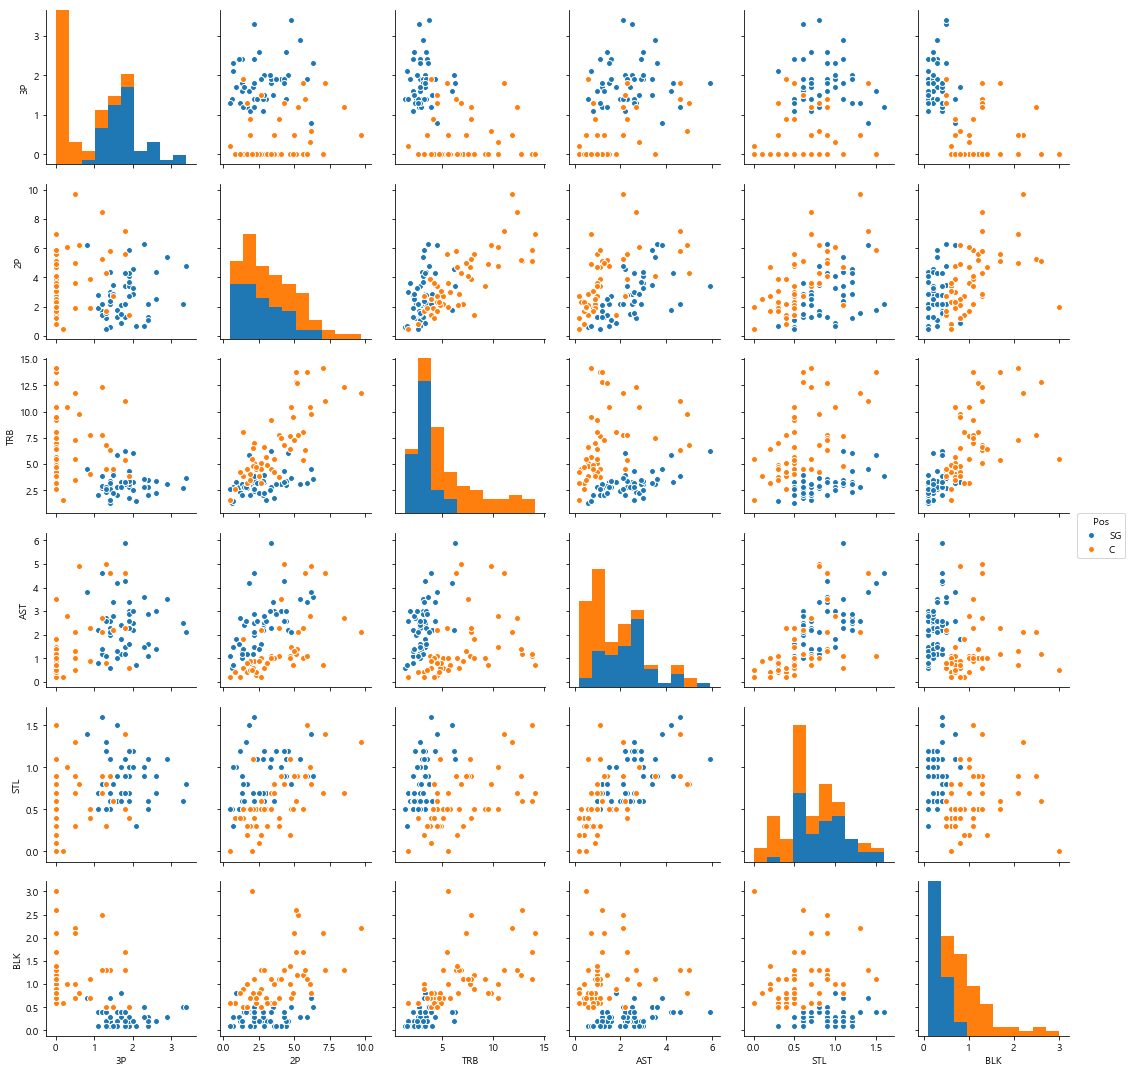

In [162]:
sns.pairplot(bk_df, hue='Pos')

In [133]:
bk_df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [163]:
# prepare feature, target
x = bk_df[['3P', '2P', 'TRB', 'AST', 'STL', 'BLK']]
y = bk_df['Pos']

In [165]:
# model -> make, training, validate
knn = KNeighborsClassifier()
knn.fit(x, y)
knn.score(x, y)

0.96

In [166]:
# divide data to train_xxx, test_xxx
train_x, test_x, train_y, test_y = train_test_split(x, y, shuffle=True, test_size=0.2, random_state=0)

In [167]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
knn.score(test_x, test_y)

0.85

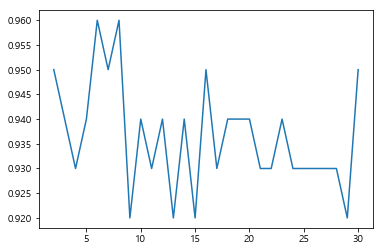

In [152]:
# cross validation
# make KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# find k
result = []
for i in range(2, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    result.append(cross_val_score(knn, x, y, cv=kf).mean())
    
plt.plot(range(2, 31), result) # k= 6

In [155]:
knn = KNeighborsClassifier(n_neighbors=4)
cross_val_score(knn, x, y, cv=kf)

0.96

In [158]:
# knn.predict([[1.3, 0.5, 1.5, 0.4, 0.6, 0.1 ]]) => error (knn은 훈련되지 않은 상태)

NotFittedError: Must fit neighbors before querying.

In [157]:
bk_df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


### SVM
- Support Vector Machine : 데이터를 분류해주는 (초)평면을 만들어 준다
- knn에 비해 효율이 좋음 (knn : 새 데이터 들어올 때마다 거리연산 필요 / svm : 모델 한 번 생성하면 계속 사용 가능)
- 모듈 설치
<code>
    from sklearn.svm import SVC
</code>
- 기본 방법
<code>
    svm = SVC()
    svm.fit(feture, target)
    svm.score(feture, target)
</code>
- 교차 검증
<code>
    svm = SVC()
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    cross_val_score(svm, feture, target, cv=kf).mean()
</code>

In [178]:
# SVM (Support Vector Machine)
# => 데이터를 분류해주는 (초)평면을 만들어 준다
# => knn에 비해 효율이 좋음 (knn : 새 데이터 들어올 때마다 거리연산 필요 / svm : 모델 한 번 생성하면 계속 사용 가능)

#sns.pairplot(iris_df, hue='species')

from sklearn.svm import SVC

In [176]:
# 모델 생성 > 훈련 > 예측/검증

iris_df.head()

y = iris_df['species']
x = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [181]:
svm = SVC()
svm.fit(x, y)
svm.score(x, y)

0.9866666666666667

In [182]:
svm = SVC()
kf = KFold(n_splits=5, shuffle=True, random_state=0)

cross_val_score(svm, x, y, cv=kf).mean()

0.9800000000000001

In [190]:
# 데이터 스케일을 다른 피쳐와 다르게 변경해 봄
iris_df['sepal_length'] = iris_df['sepal_length'] * 20

y = iris_df['species']
x = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

svm = SVC()
kf = KFold(n_splits=5, shuffle=True, random_state=0)

cross_val_score(svm, x, y, cv=kf).mean() # => 스코어가 떨어짐 => 머신러닝 적용 전 데이터의 스케일을 조절하는 과정이 필요함을 알 수 있음(feature enginiering)

0.86

## 정리

In [191]:
# 데이터 분석 과정
# raw data => dataframe => feture engineering => ml => feture engineering => ... (반복)

## Kaggle 타이타닉 데이터 머신러닝 실습

In [192]:
path = r'C:\Users\cypark\Desktop\실습자료\GBS Python 자료\회귀분석&머신러닝 용 데이터\캐글 타이타닉\test.csv'
test_df = pd.read_csv(path, engine = 'python')

path = r'C:\Users\cypark\Desktop\실습자료\GBS Python 자료\회귀분석&머신러닝 용 데이터\캐글 타이타닉\train.csv'
train_df = pd.read_csv(path, engine = 'python')

In [194]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
# data type check
train_df.dtypes
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [202]:
# 결측 데이터 check
train_df.isna().sum()
train_df.isna().sum() / len(train_df) * 100 # 결측 비율 확인

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [203]:
test_df.isna().sum()
test_df.isna().sum() / len(test_df) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [208]:
# test, trian concat
# sort = False : 열 개수가 다른 데이터프레임을 concat하는 경우, 자동 정렬이 됨. => 데이터 섞이면 안되므로 sort = False 설정!
# reset_index : 각 데이터프레임의 인덱스가 유지된 상태로 concat되어, 같은 인덱스가 반복되는 문제 발생

total = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [214]:
total.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [210]:
total.isna().sum() / len(total) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

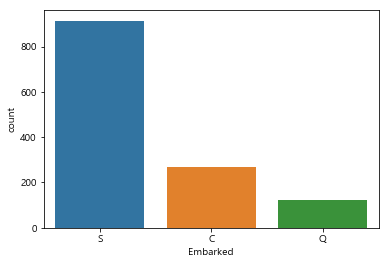

In [213]:
# Embarked 결측 데이터 채우기

sns.countplot(data=total, x='Embarked')  # 빈도수가 가장 높은 s로 결측값을 채울 수 있다

(0, 100)

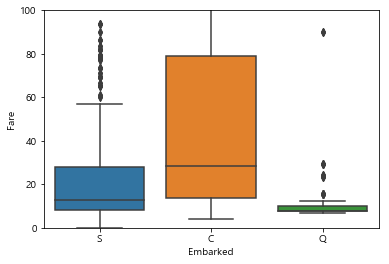

In [218]:
sns.boxplot(data=total, x='Embarked', y='Fare')
plt.ylim(0, 100)

In [220]:
# dataframe의 값을 일괄적으로 변경하는 방법 : total.loc[ index(or filtering), col ] = 변결할 데이터

total.loc[ total['Embarked'].isna(), 'Embarked' ] = 'S'

In [224]:
total [ total['Embarked'].isna() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [225]:
total.isna().sum() / len(total) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.000000
dtype: float64

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


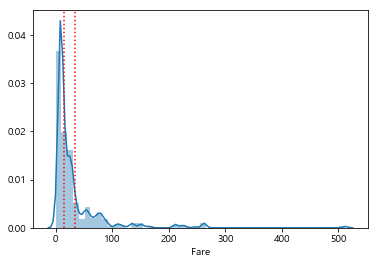

In [231]:
sns.distplot(total['Fare'].dropna())   # 오른쪽으로 꼬리가 길다 => 평균치는 쓰지 말자. 
plt.axvline( total['Fare'].mean() , c='red', ls=":")
plt.axvline( total['Fare'].median() , c='red', ls=":")  # => 중앙값을 쓰자

(0, 150)

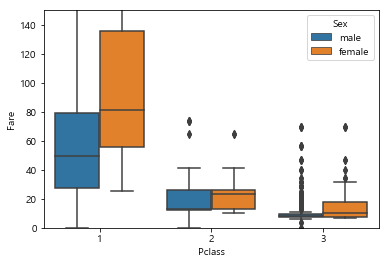

In [234]:
sns.boxplot(data=total, x='Pclass', y='Fare', hue='Sex')  # Fare를 예측하기 위해 Pclass, Sex를 사용할 수 있겠다
plt.ylim(0, 150)

In [236]:
total.groupby(['Pclass', 'Sex']).median() # Pclass, Sex 기준 중앙값 체크

PassengerId  Survived   Age  SibSp  Parch      Fare
Pclass Sex                                                        
1      female          710       1.0  36.0      0      0  80.92915
       male            648       0.0  42.0      0      0  49.50420
2      female          589       1.0  28.0      0      0  23.00000
       male            715       0.0  29.5      0      0  13.00000
3      female          637       0.5  22.0      0      0  10.48960
       male            649       0.0  25.0      0      0   7.89580

In [237]:
total [ total['Fare'].isna() ] # 3등급, 남자인 대상이 비어있다

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [238]:
total.loc[ total['Fare'].isna(), 'Fare' ] = 7.89580 # groupby 로 알아낸 중앙값으로 채운다

In [239]:
total [ total['Fare'].isna() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [241]:
total['Fare'].describe()  # min이 0인 경우도 결측값으로 보자

count    1309.000000
mean       33.276075
std        51.743642
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [242]:
total [ total['Fare']==0 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [243]:
total.loc[ (total['Pclass'] == 1) & (total['Sex']=='female') & (total['Fare']==0), 'Fare' ] = 80.92915
total.loc[ (total['Pclass'] == 1) & (total['Sex']=='male') & (total['Fare']==0), 'Fare' ] = 49.50420
total.loc[ (total['Pclass'] == 2) & (total['Sex']=='female') & (total['Fare']==0), 'Fare' ] = 23.00000
total.loc[ (total['Pclass'] == 2) & (total['Sex']=='male') & (total['Fare']==0), 'Fare' ] = 13.00000
total.loc[ (total['Pclass'] == 3) & (total['Sex']=='female') & (total['Fare']==0), 'Fare' ] = 10.48960
total.loc[ (total['Pclass'] == 3) & (total['Sex']=='male') & (total['Fare']==0), 'Fare' ] = 7.89580

In [245]:
total [ total['Fare']==0 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [247]:
total.isna().sum() / len(total) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.463713
Embarked        0.000000
dtype: float64

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


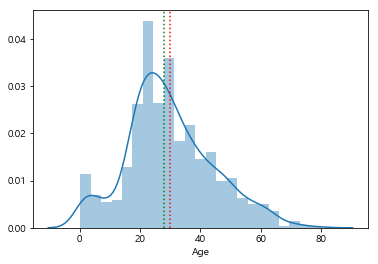

In [250]:
# Age 결측값 채우기

sns.distplot(total['Age'].dropna())  # 
plt.axvline(total['Age'].mean(), color='red', ls=':')
plt.axvline(total['Age'].median(), color='green', ls=':')

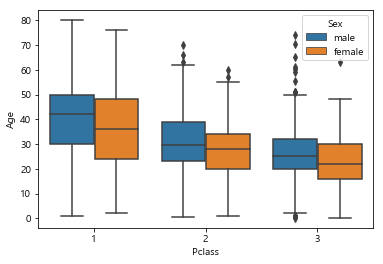

In [252]:
sns.boxplot(data=total, x='Pclass', y='Age', hue='Sex')

In [253]:
total.groupby(['Pclass', 'Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   689.652778  0.968085  37.037594  0.555556  0.472222   
       male     658.687151  0.368852  41.029272  0.340782  0.279330   
2      female   632.188679  0.921053  27.499223  0.500000  0.650943   
       male     695.976608  0.157407  30.815380  0.327485  0.192982   
3      female   628.393519  0.500000  22.185329  0.791667  0.731481   
       male     645.888438  0.135447  25.962264  0.470588  0.255578   

                     Fare  
Pclass Sex                 
1      female  109.412385  
       male     71.824303  
2      female   23.234827  
       male     20.361086  
3      female   15.324250  
       male     12.470358

In [258]:
total.loc[ (total['Pclass']==1) & (total['Sex']=='female') & (total['Age'].isna()), 'Age' ] = 37.037594
total.loc[ (total['Pclass']==1) & (total['Sex']=='male') & (total['Age'].isna()), 'Age' ] = 41.029272
total.loc[ (total['Pclass']==2) & (total['Sex']=='female') & (total['Age'].isna()), 'Age' ] = 27.499223
total.loc[ (total['Pclass']==2) & (total['Sex']=='male') & (total['Age'].isna()), 'Age' ] = 30.815380
total.loc[ (total['Pclass']==3) & (total['Sex']=='female') & (total['Age'].isna()), 'Age' ] = 22.185329
total.loc[ (total['Pclass']==3) & (total['Sex']=='male') & (total['Age'].isna()), 'Age' ] = 25.962264

In [259]:
total.isna().sum() / len(total) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.463713
Embarked        0.000000
dtype: float64

In [260]:
# Feature Engineering => 특성값을 모델에 맞게 가공하는 것

# 카테고리 데이터를 숫자데이터로 변환하는 것 = 인코딩
total['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [270]:
# name => Mr, Mrs, Master, Dona ...

total['Name_1'] = total['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

In [271]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


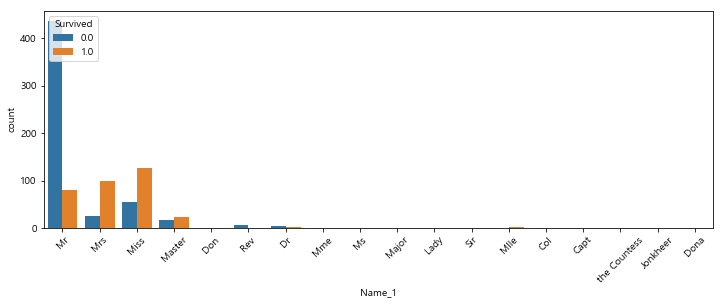

In [279]:
plt.figure(figsize=(12, 4))
sns.countplot(data=total, x='Name_1', hue='Survived')
# plt.ylim(0,130)
plt.xticks(rotation=45)
plt.show()

# mr / women(mrs & miss) / master / etc 로 나누자

In [281]:
total['Name_1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [285]:
# 데이터프레임의 열 값을 특정 값으로 대체할 때, df['col'].map(대체값을 정의한 map)

name_map = {'Mr' : 'Mr', 'Mrs' : 'Wo', 'Miss' : 'Wo', 'Master' : 'Master', 
 'Don' : 'etc', 'Rev' : 'etc', 'Dr' : 'etc', 'Mme' : 'Wo', 'Ms' : 'Wo',
 'Major' : 'etc', 'Lady' : 'Wo', 'Sir' : 'etc', 'Mlle' : 'Wo', 'Col' : 'etc', 
 'Capt' : 'etc', 'the Countess' : 'etc', 'Jonkheer' : 'etc', 'Dona' : 'etc'}

total['Name_2'] = total['Name_1'].map(name_map)

In [286]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_1,Name_2
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Wo
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Wo
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Wo
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


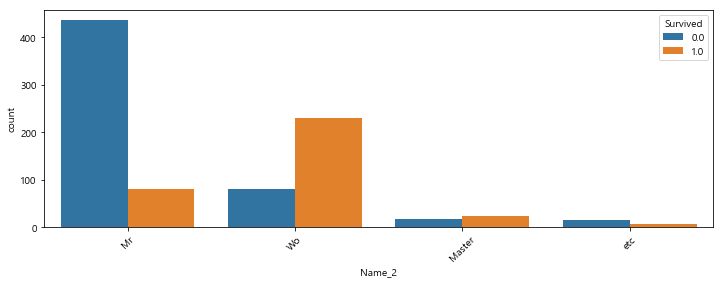

In [287]:
plt.figure(figsize=(12, 4))
sns.countplot(data=total, x='Name_2', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [290]:
# Family = SibSp + Parch

total['Family'] = total['SibSp'] + total['Parch']

total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_1,Name_2,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Wo,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Wo,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Wo,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0


In [291]:
total['Family'].unique()   # Family 는 카테고리이다

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

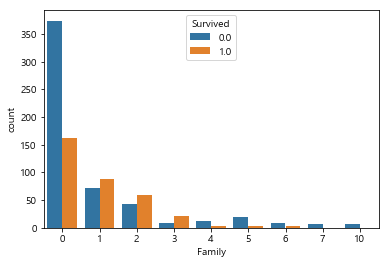

In [294]:
sns.countplot(data=total, x='Family', hue='Survived') # 0 / 1~3 / 4 이상

In [297]:
family_map = {0:'alone', 1:'small_f', 2:'small_f', 3:'small_f', 4:'big_f', 5:'big_f', 6:'big_f', 7:'big_f', 10:'big_f'}

total['Family_1'] = total['Family'].map(family_map)
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_1,Name_2,Family,Family_1
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,1,small_f
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Wo,1,small_f
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Wo,0,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Wo,1,small_f
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0,alone


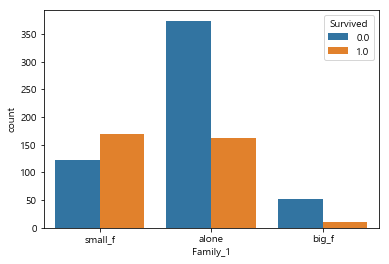

In [298]:
sns.countplot(data=total, x='Family_1', hue='Survived') # alone, big_f 가 small_f보다 죽을 확률이 높다

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


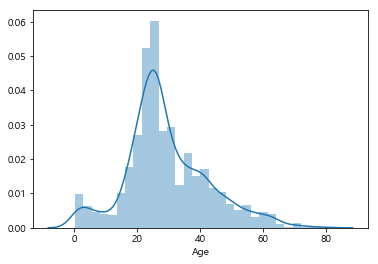

In [299]:
# Age 표준화 (스케일링)
sns.distplot(total['Age'])

In [303]:
# min max 스케일링
# (컬럼값 - 최소값) / (최대값 - 최소값) => 0~1의 값으로 스케일링  * 만약 범위를 늘리려면(ex : 0~3) *3 한다

age_max = total['Age'].max()
age_min = total['Age'].min()

total['Age_1'] = (total['Age'] - age_min) / (age_max-age_min)

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


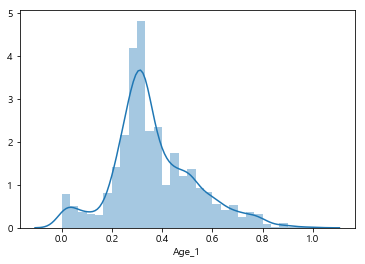

In [304]:
sns.distplot(total['Age_1'])

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


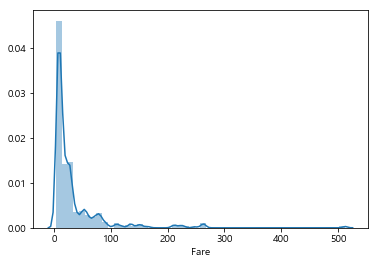

In [312]:
# Fare 정규화 => 로그 값으로 바꾸기
sns.distplot(total['Fare'])  # 대부분의 데이터가 한 쪽으로 몰려있는데, 꼬리가 김 => 쓸모 없는 구간때문에 범위가 길어짐 => 쏠림 완화가 필요함

In [308]:
import numpy as np

total['Fare_1'] = np.log( total['Fare'] )  # 시리즈를 log 값으로 바꿈

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


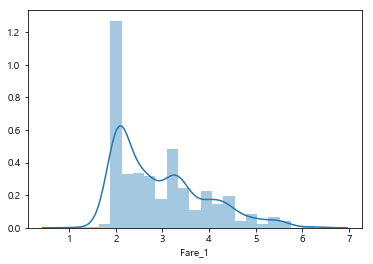

In [310]:
sns.distplot(total['Fare_1'])

C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\cypark\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 100)

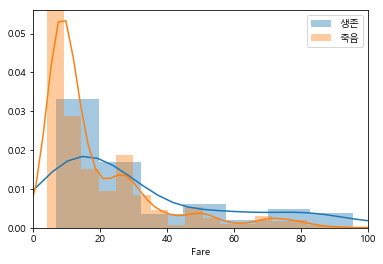

In [316]:
sns.distplot(total[total['Survived']==1]['Fare'], label='생존')
sns.distplot(total[total['Survived']==0]['Fare'], label='죽음')
plt.legend()

plt.xlim(0, 100)

In [ ]:
# kaggle 가입하기